In [21]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [22]:
data = pd.read_csv('C:/Users/MalaniR/Downloads/Ethereum 5 Year prices.csv', index_col='Date')

In [23]:
data.shape

(1827, 5)

In [24]:
data.head()

,Close,Open,High,Low,Vol.
Date,,,,,
15/04/2018,533.90,502.52,534.18,502.52,988.29K
16/04/2018,511.82,533.89,537.32,498.87,1.03M
17/04/2018,503.19,511.75,520.86,501.73,826.71K
18/04/2018,525.66,503.24,526.41,502.02,759.15K
19/04/2018,567.49,525.74,570.15,522.15,1.04M


In [25]:
data.tail()

,Close,Open,High,Low,Vol.
Date,,,,,
11/04/2023,1889.86,1910.35,1935.75,1884.64,428.26K
12/04/2023,1916.58,1889.86,1930.46,1857.35,669.43K
13/04/2023,2012.11,1916.59,2018.73,1899.96,721.56K
14/04/2023,2099.98,2012.12,2127.56,2009.53,957.03K
15/04/2023,2098.28,2099.98,2110.30,2074.33,539.47K


In [26]:
future_days = 90

In [27]:
# Create a new column
data[str(future_days)+'_Day_Price_Forecast'] = data[['Close']].shift(-future_days)

# Show the data
data[['Close',str(future_days)+'_Day_Price_Forecast']]

,Close,90_Day_Price_Forecast
Date,,
15/04/2018,533.90,434.09
16/04/2018,511.82,450.81
17/04/2018,503.19,479.79
18/04/2018,525.66,499.87
19/04/2018,567.49,480.00
...,...,...
11/04/2023,1889.86,NaN
12/04/2023,1916.58,NaN
13/04/2023,2012.11,NaN


In [28]:
X = np.array(data[['Close']])
X = X[:data.shape[0]-future_days]
print(X)

[[ 533.9 ]
 [ 511.82]
 [ 503.19]
 ...
 [1450.86]
 [1550.02]
 [1552.69]]


In [29]:
y = np.array(data[str(future_days)+'_Day_Price_Forecast'])
y = y[:-future_days]
print(y)

[ 434.09  450.81  479.79 ... 2012.11 2099.98 2098.28]


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)

In [31]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma = 0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [32]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:', svr_rbf_confidence)

svr_rbf accuracy: 0.7266212145078158


In [33]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[ 170.63747707 1532.11545633 1551.09718086 1960.15642068  170.79697447
  399.04038499  261.4479632  3146.08495072 3313.93495655  180.67794551
  434.01854849  170.37788844 1833.36869883  213.87523544  173.71043616
  194.32396966  419.72112656 3340.9111166   173.94424172 3313.51553301
  242.93127947  413.71805237  170.88201962 2604.22537695  171.4499037
  171.05364575  210.79533884  210.89387634  509.87474     234.54063965
 1524.96375369 1947.77799141 1589.88368584  494.33059015 2777.25042991
  170.37805161  277.52401044  415.20744014  407.2821156   171.69101378
  184.01372064 3228.65784212 1604.01124434  170.39150707  416.29260754
 1606.36478399  188.00066123 1626.9222985  1526.6260653   170.47564448
  170.62820007  340.87784781 2029.78271353 3279.04574673  175.5312983
  170.41280285  473.03307643  170.57655432 2241.54478565 2651.70211197
  175.1914985   475.08552368 3316.18350113 1935.32143192  174.64618035
  171.06927297 1973.37242562 1765.28986476 2796.45459149 1634.33830396
  460.16

In [34]:
print(y_test)

[ 192.27 1299.76 2646.79 1128.39  237.32 1816.69  180.78 2606.5  3307.9
  142.53 1804.85  250.37 3922.23  337.46  145.79  211.45 1372.   3140.71
  282.26 3116.92  206.62  382.41  265.11 2983.95  232.02  169.95  180.65
  475.8   197.04  207.   1282.87 4602.21 1220.46 1794.14 1531.42  248.98
  175.78 1366.27  378.25  247.78  115.83 4290.88 2066.93  131.03  472.03
 1590.47  124.92 1352.07 2706.1   142.58  164.36  638.26 2083.09 3327.74
  167.9   267.99 1792.38  160.34 2940.7  1231.03  134.4   229.15 2342.3
 1680.    151.04  210.37 1490.83 3489.52 2556.96 1820.78 1777.28 3878.29
 1917.99  140.81 1213.93 1846.51 1686.8  3786.19 3861.55 1459.6  2367.28
 2606.23 2810.42  186.58 3830.67  149.11  183.12  591.09 1200.52 1326.44
 1788.06 1294.41  381.97  220.51  135.72  607.85 1240.46 1847.95  243.63
 1779.47   90.86 3297.04  279.33  228.13  144.08 1604.69 1913.88 3146.01
   86.31 1675.43  386.42 2622.15 1295.69 1831.49 3827.55  237.54 1718.81
 3876.78   83.9  2098.28 1520.64  240.23 1139.74  202

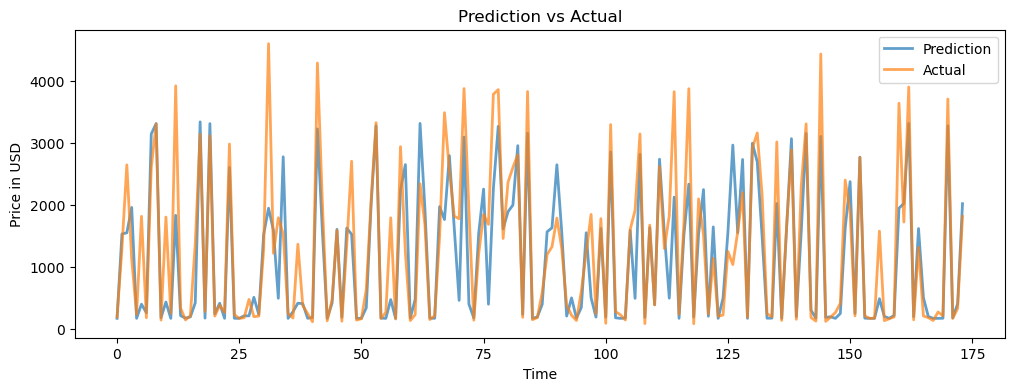

In [35]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label = 'Prediction', lw=2, alpha=0.7)
plt.plot(y_test, label='Actual', lw=2, alpha=0.7)
plt.title('Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()

In [36]:
import math
from sklearn.metrics import mean_squared_error

In [37]:
math.sqrt(mean_squared_error(svm_prediction, y_test))

647.8488743530415

In [38]:
from sklearn.metrics import mean_absolute_error as mae
error = mae(y_test, svm_prediction)
print("Mean absolute error : " + str(error))

Mean absolute error : 394.3794355972284


In [39]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE
error_MAPE= MAPE(y_test, svm_prediction)
print("MAPE: ", error_MAPE)

MAPE:  0.3369800153005993


In [40]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

error2 = mean_absolute_percentage_error(y_test, svm_prediction)
print("MAPE: ", error2)

MAPE:  33.698001530059926
